In [1]:
# Obejective: Predict whether the patient will get pregnant based on IVF treatment factors

In [2]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#  load the dataset
df = pd.read_csv("HealthCareProject.csv")

In [4]:
#About the Dataset
df.head()

# v1 - Age
# v2 - Classifier - Primary, secondary i.e., sterility. >> 
#     (Primary infertility (The patient has never conceived before).Secondary infertility (The patient has conceived before but is now struggling with infertility))
# v3 - Years before pregnancy(Years after marriage) 
# v4 - Classifier - infertity by m, f, both m and f
# v5 - Classifier - whose egg we are using, self or donatd
# v6 - Classifier - male sperm (self or donor or combination of both)
# v7 - classifier - method to activate sperms, stimulation
# v8--  how we got sperms 4 to 5 methods, example masturbation, etc. --- outcome classifier.
# v9 - Categorical number - No of eggs.
# v10 - Predictive Outcomes - classifier - no of eggs formed - Intermediate outcomes - How many eggs formed 
# v11 - Predictive outcomes - classifier - How many eggs got converted to embryosss
# v12 - Does it come under input variable in first tier or second tier. Immediately or after frozen
# v13 – Pregnant (Yes/No)


,Unnamed: 0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,METype,1,1,1.0,1,1,1,1,1,1,2,2,1,3
1,C1,32,2,3.5,3,1,1,2,1,5,2,3,2,1
2,C2,42,1,3.5,3,1,1,1,2,3,2,3,2,3
3,C3,29,2,3.5,2,1,1,1,2,8,7,8,2,1
4,C4,23,1,3.0,3,1,1,1,2,15,9,9,2,1


In [5]:
#dropped unnecessary  column and row and resetting index 

df = df.drop(columns='Unnamed: 0').drop(index=0).reset_index(drop=True)


In [6]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3.5,3,1,1,2,1,5,2,3,2,1
1,42,1,3.5,3,1,1,1,2,3,2,3,2,3
2,29,2,3.5,2,1,1,1,2,8,7,8,2,1
3,23,1,3.0,3,1,1,1,2,15,9,9,2,1
4,22,1,5.0,3,1,1,1,1,5,3,3,2,3


In [7]:
#checking for null values
df.isnull().sum()

v1     0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
v10    0
v11    0
v12    0
v13    0
dtype: int64

In [8]:
#statistical View of columns (count, mean , STD, min ,max etc)
df.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,31.482143,10.254464,20.089732,16.098214,23.491071,23.424107,210.433036,108.71875,122.812500,130.580357,130.723214,130.977679,2.348214
std,5.305860,94.058957,114.387135,114.776090,147.729573,147.739783,407.260689,309.09484,318.236608,328.984281,328.929578,335.493672,0.920224
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,1.000000,3.375000,3.000000,1.000000,1.000000,1.000000,1.00000,5.000000,4.000000,4.000000,2.000000,1.000000
50%,31.000000,1.000000,6.000000,3.000000,1.000000,1.000000,1.000000,2.00000,8.000000,7.000000,7.000000,2.000000,3.000000
75%,35.000000,2.000000,10.000000,3.000000,1.000000,1.000000,1.000000,3.00000,12.000000,11.000000,10.000000,2.000000,3.000000
max,49.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,3.000000


Noticed extreme values will replace it with forwardfill, we are going to use mask which changes extreme value with NaN, since NaN comes under float our dataset might turn in to float .. not that it changes anything but i just like int

In [9]:
for col in df.columns:
    df[col] = df[col].mask(df[col] == 999).ffill().astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   v1      224 non-null    int64
 1   v2      224 non-null    int64
 2   v3      224 non-null    int64
 3   v4      224 non-null    int64
 4   v5      224 non-null    int64
 5   v6      224 non-null    int64
 6   v7      224 non-null    int64
 7   v8      224 non-null    int64
 8   v9      224 non-null    int64
 9   v10     224 non-null    int64
 10  v11     224 non-null    int64
 11  v12     224 non-null    int64
 12  v13     224 non-null    int64
dtypes: int64(13)
memory usage: 22.9 KB


In [11]:
# # Define bin edges and labels
bins = [19, 25, 30, 35, 40, 100]
labels = ['20-25', '26-30', '31-35', '36-40', '41+']

In [12]:
# Apply binning
df['age_bin'] = pd.cut(df['v1'], bins=bins, labels=labels)

In [13]:
# #size() -- counts how many rows exits for each combination of age
# #unstack(fill_value=0) - unstack pivots v13 values into separte columns 
age_preg = df.groupby(['age_bin', 'v13']).size().unstack()

age_preg


C:\Users\Anup Sarkar\AppData\Local\Temp\ipykernel_8308\2122182490.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_preg = df.groupby(['age_bin', 'v13']).size().unstack()


v13,1,2,3
age_bin,,,
20-25,5,1,18
26-30,28,3,43
31-35,20,1,59
36-40,11,3,17
41+,4,0,9


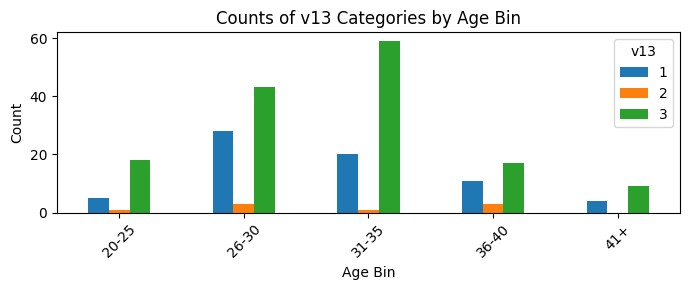

In [14]:

ax = age_preg.plot(
    kind='bar',       # grouped bars
    figsize=(7, 3)   # adjust size as needed
)

ax.set_title('Counts of v13 Categories by Age Bin')
ax.set_xlabel('Age Bin')
ax.set_ylabel('Count')
ax.legend(title='v13')       # legend for the v13 categories
plt.xticks(rotation=45)       # tilt x-labels if they overlap
plt.tight_layout()            # nice padding
plt.show()


In [15]:
#checking for unique values in dataset having a look at data
# for col in df.columns:
#     unique_vals = df[col].unique()
#     num_unique = len(unique_vals)
#     print(f"Column: {col}")
#     print(f" - Unique values ({num_unique}): {unique_vals}\n")

#     print("*"*50)

In [16]:
# filtered_row = df.loc[df['v13'] == 1]
# print(filtered_row)

Determined that 1 is success and 2,3 failure ..hence mapping

In [17]:
df['v13'] = df['v13'].map({1: 1, 2: 0, 3: 0})

In [18]:
# Select all columns except the last one as features (X)
x = df.iloc[:,:-1]


# Select the last column ('v13') as the target variable (y)
y = df['v13']  


In [19]:
y.value_counts()

v13
0    155
1     69
Name: count, dtype: int64

to avoid model getting biased lets resample

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
ros = RandomOverSampler()
x, y =ros.fit_resample(x,y)

In [22]:
y.value_counts()

v13
1    155
0    155
Name: count, dtype: int64

lets scale the values .. to bring it on same scale normal for tree model doesn't need scaling but to test out other model eventually we need scaling so why not do it now 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [25]:
x = pd.DataFrame(scaler.transform(x), columns = x.columns)
x

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,0.082060,1.428011,-0.851884,0.442054,-0.569900,-0.370315,5.783117,-0.809235,-0.797357,-1.342239,-1.115923,0.315104,1.0
1,1.952552,-0.700275,-0.851884,0.442054,-0.569900,-0.370315,-0.172917,0.106323,-1.303875,-1.342239,-1.115923,0.315104,-1.0
2,-0.479087,1.428011,-0.851884,-1.337645,-0.569900,-0.370315,-0.172917,0.106323,-0.037580,-0.003455,0.240689,0.315104,1.0
3,-1.601382,-0.700275,-0.851884,0.442054,-0.569900,-0.370315,-0.172917,0.106323,1.735232,0.532059,0.512012,0.315104,1.0
4,-1.788431,-0.700275,-0.385716,0.442054,-0.569900,-0.370315,-0.172917,-0.809235,-0.797357,-1.074482,-1.115923,0.315104,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.666136,-0.700275,-1.084968,0.442054,-0.569900,1.755567,-0.172917,1.937440,0.215679,0.532059,0.512012,0.315104,1.0
306,-1.601382,-0.700275,-0.851884,0.442054,-0.569900,-0.370315,-0.172917,0.106323,1.735232,0.532059,0.512012,0.315104,1.0
307,2.326650,-0.700275,1.478955,0.442054,1.754693,-0.370315,-0.172917,-0.809235,-0.037580,0.264302,0.240689,0.315104,1.0
308,-0.853186,-0.700275,-0.851884,0.442054,-0.569900,-0.370315,-0.172917,0.106323,1.988490,2.406357,2.411269,0.315104,1.0


feature selection using forward elimanation 

In [26]:
# pip install mlxtend

In [27]:
# ### 1️⃣ Correlation Analysis ###
# plt.figure(figsize=(10,6))
# sns.heatmap(x.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Feature Correlation Heatmap")
# plt.show()

train test and split the model 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state= 15)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()


In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [30]:
sfs = SFS(RFC, k_features=3, forward=True, scoring='accuracy', cv=5)

In [31]:
sfs.fit(x_train, y_train)
print("Forward Selection result")
print(f"selected features : {sfs.k_feature_names_}")
print(f"Cross_val accuarcy : {sfs.k_score_:.3f}")

Forward Selection result
selected features : ('v1', 'v2', 'v13')
Cross_val accuarcy : 1.000


In [32]:
x_train_selected = sfs.transform(x_train)
x_test_selected = sfs.transform(x_test)

In [34]:
RFC.fit(x_train_selected,y_train)
RFC.score(x_test_selected,y_test)*100, RFC.score(x_train_selected,y_train)*100

(100.0, 100.0)

In [35]:
rfc_yPred = RFC.predict(x_test_selected)
print(f"{accuracy_score(y_test, rfc_yPred)}")

1.0


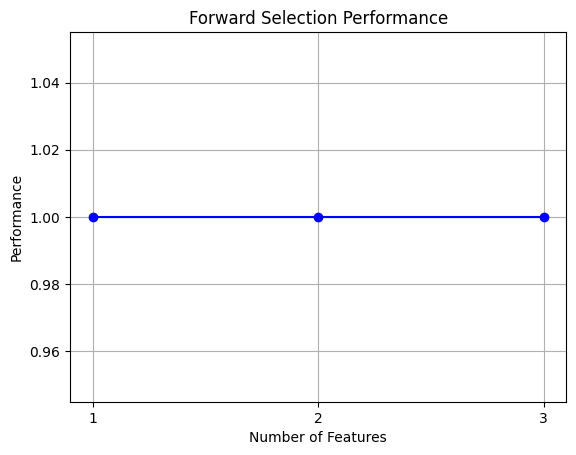

In [36]:
# Visualization
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Forward Selection Performance')
plt.grid()
plt.show()

randomforest initialy with default values

Using gridSearchCV to find out best parameter aka hyperparameter tuning

In [37]:
# from sklearn.model_selection import GridSearchCV

In [38]:
# param_grid = {
#     "n_estimators": [10, 15, 25, 35, 50, 65, 100],  
#     "criterion": ["gini", "entropy"],     
#     "max_depth": [10,15,20,25,30]                
# }

In [39]:
# gdr = GridSearchCV(RFC, param_grid=param_grid, cv=5)
# gdr.fit(x_train, y_train)

In [40]:
# gdr.best_params_  

In [41]:
# gdr.best_score_

In [42]:
# hypertuneRf= RandomForestClassifier(criterion= 'entropy', max_depth=10, n_estimators= 150, random_state= 20)

In [43]:
# hypertuneRf.fit(x_train,y_train)
# hypertuneRf.score(x_test, y_test)* 100, hypertuneRf.score(x_train, y_train)*100

below suport vector  and decision tree classifer didn't provided best result hence commtting out 

In [44]:
# from sklearn.svm import SVC

In [45]:
# svc_model = SVC(kernel='poly')
# svc_model.fit(x_train,y_train)

In [46]:
# svc_model.score(x_test, y_test), svc_model.score(x_train,y_train)
# # (0.6451612903225806, 0.7862903225806451)

In [47]:
# psvc = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}


In [48]:
# gdsv = GridSearchCV(svc_model, param_grid= psvc, cv=5)
# gdsv.fit(x_train, y_train)

In [49]:
# gdsv.best_params_

In [50]:
# gdsv.best_score_
#np.float64(0.6092244897959184)

In [51]:
# from sklearn.tree import DecisionTreeClassifier

In [52]:
# #'criterion': 'entropy',
#  'max_depth': 20,
#  'max_features': 'sqrt',
#  'random_state': 10}
# #
# #

In [53]:
# tree_model = DecisionTreeClassifier(criterion='entropy', max_depth= 20 , max_features= "sqrt", random_state= 10)
# tree_model.fit(x_train, y_train)

In [54]:
# #parameters
# pdstc= {"criterion":['gini', 'entropy', 'log_loss'],
# "max_depth": [10,20,30,40],
# "max_features": ['auto', 'sqrt', 'log2'] ,
# "random_state": [10,15,20,30,42]}

In [55]:
# gddtc = GridSearchCV(tree_model, param_grid= pdstc, cv=5)

# gddtc.fit(x_train, y_train)

In [56]:
# gddtc.best_params_

In [57]:
# tree_model.score(x_test,y_test), tree_model.score(x_train,y_train)

In [58]:

# Train the Random Forest Model
model = RandomForestClassifier(criterion='gini', max_depth=80 ,n_estimators= 80 , random_state = 80)

model.fit(x_train, y_train)

model.score(x_test, y_test)*100, model.score(x_train, y_train)*100



(100.0, 100.0)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
y_pred = model.predict(x_test)

results = pd.DataFrame({'Acutal': y_test.values, 'Predicted': y_pred})
print(results)



    Acutal  Predicted
0        1          1
1        1          1
2        1          1
3        0          0
4        1          1
..     ...        ...
57       0          0
58       0          0
59       0          0
60       1          1
61       1          1

[62 rows x 2 columns]


In [61]:
accuarcy = accuracy_score(y_test, y_pred)
print(f"Accuary : {accuarcy}")


Accuary : 1.0


In [62]:
conf_mat = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix : \n {conf_mat}")

Confusion Matrix : 
 [[35  0]
 [ 0 27]]


In [63]:
cls_rep = classification_report(y_test, y_pred)
print(f"Classification Reort : \n {cls_rep}")

Classification Reort : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        27

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

